In [1]:
import pandas as pd 
import requests
import json

from multiprocessing import Pool


In [11]:
# https://curlconverter.com/

headers = {
    'authority': 'consumer-api.leafly.com',
    'accept': 'application/json',
    'accept-language': 'en-GB,en;q=0.6',
    # Requests sorts cookies= alphabetically
    'if-none-match': 'W/"224a3f637e080602bd933b9d99864385"',
    'origin': 'https://www.leafly.com',
    'referer': 'https://www.leafly.com/',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.102 Safari/537.36',
    'x-app': 'web-web',
    'x-environment': 'prod',
}



In [6]:
response = requests.get('https://consumer-api.leafly.com/api/strain_playlists/v2?&skip=0&take=60&lat=45.6684&lon=-111.2422', cookies=cookies, headers=headers)

In [ ]:
get_batch = lambda x: f'https://consumer-api.leafly.com/api/strain_playlists/v2?&skip={x*60}&take=60&lat=45.6684&lon=-111.2422'

In [16]:
len(strains_data) == len(strains)

True

In [51]:
strains_id = []
strains_data = []
strains_slug = []

In [52]:

for i in range(103):
    url = f'https://consumer-api.leafly.com/api/strain_playlists/v2?&skip={i*60}&take=60&lat=45.6684&lon=-111.2422'
    response = requests.get(url, headers=headers)
    data = response.json()
    try:
        strains_id.extend(strain['id'] for strain in data['hits']['strain'])
        strains_slug.extend(strain['slug'] for strain in data['hits']['strain'])
        strains_data.extend(iter(data['hits']['strain']))
    except Exception:
        print(f'failed to grab 60 at {60*i}')



In [43]:
# option 1 - use the strain slug as keys for the dictionary
len(strains_data)
#duplicate strain names

6064

In [58]:
data = dict(zip(strains_slug, strains_data))
len(data.items())

5713

In [59]:

with open('strains1.json', 'w') as f:
    json.dump(data, f)
    

In [ ]:
#prettify print one item from strains_data to examine the format

In [27]:
# convert data to a pandas dataframe
import pandas


{'wedding-cake': {'id': 233839,
  'averageRating': 4.564484126984127,
  'category': 'Hybrid',
  'flowerImageSvg': 'https://public.leafly.com/strains/flowers/wedding-cake-flower.svg',
  'name': 'Wedding Cake',
  'nugImage': 'https://leafly-public.s3-us-west-2.amazonaws.com/strains/photos/m2y50HYRBu0dHY4JSdSx_wedding-cake_jman.jpg',
  'phenotype': 'Hybrid',
  'reviewCount': 2016,
  'shortDescriptionPlain': None,
  'slug': 'wedding-cake',
  'strainTopTerp': 'limonene',
  'subtitle': 'aka Triangle Mints #23, Pink Cookies',
  'thc': 24.0,
  'topEffect': 'Relaxed',
  'distanceMi': 2.274059975920627,
  'cannabinoids_cbc_displayName': 'CBC',
  'cannabinoids_cbc_order': 4,
  'cannabinoids_cbc_percentile25': None,
  'cannabinoids_cbc_percentile50': 0.0,
  'cannabinoids_cbc_percentile75': None,
  'cannabinoids_cbd_displayName': 'CBD',
  'cannabinoids_cbd_order': 3,
  'cannabinoids_cbd_percentile25': 0.0,
  'cannabinoids_cbd_percentile50': 0.0,
  'cannabinoids_cbd_percentile75': 0.0,
  'cannabinoi

In [60]:
# https://stackoverflow.com/a/41801708
strains_df = pd.concat([pd.json_normalize(v, sep='_') for v in strains_data])
strains_df.reset_index(drop=True, inplace=True)
strains_df.to_csv('strains.csv',index=False)

In [2]:
df = pd.read_csv('strains.csv')
df.head()

id  averageRating category  \
0  233839       4.564856   Hybrid   
1   65591       4.639413   Hybrid   
2  504256       4.556463   Hybrid   
3  503179       4.619760   Indica   
4  174127       4.601003   Hybrid   

                                      flowerImageSvg            name  \
0  https://public.leafly.com/strains/flowers/wedd...    Wedding Cake   
1  https://public.leafly.com/strains/flowers/orig...             GG4   
2  https://public.leafly.com/strains/flowers/runt...           Runtz   
3  https://public.leafly.com/strains/flowers/ice-...  Ice Cream Cake   
4  https://public.leafly.com/strains/flowers/gela...          Gelato   

                                            nugImage phenotype  reviewCount  \
0  https://leafly-public.s3-us-west-2.amazonaws.c...    Hybrid         2043   
1  https://s3-us-west-2.amazonaws.com/leafly-imag...    Hybrid         4978   
2  https://s3-us-west-2.amazonaws.com/leafly-imag...    Hybrid          735   
3  https://images.leafly.com/flower-images/defaul...    Indica         1002   
4  https://s3-us-west-2.amazonaws.com/leafly-imag...    Hybrid         2193   

                               shortDescriptionPlain            slug  ...  \
0                                                NaN    wedding-cake  ...   
1  Original Glue (GG4) is a potent hybrid strain ...   original-glue  ...   
2                                                NaN           runtz  ...   
3                                                NaN  ice-cream-cake  ...   
4                                                NaN          gelato  ...   

  terps_myrcene_score terps_ocimene_name  terps_ocimene_description  \
0            0.355683            ocimene                        NaN   
1            0.410000            ocimene                        NaN   
2            0.062000            ocimene                        NaN   
3            0.199178            ocimene                        NaN   
4            0.128459            ocimene                        NaN   

  terps_ocimene_score  terps_pinene_name terps_pinene_description  \
0            0.008820             pinene                      NaN   
1            0.015000             pinene                      NaN   
2            0.017500             pinene                      NaN   
3            0.012209             pinene                      NaN   
4            0.027078             pinene                      NaN   

   terps_pinene_score  terps_terpinolene_name  terps_terpinolene_description  \
0            0.130472             terpinolene                            NaN   
1            0.118333             terpinolene                            NaN   
2            0.091542             terpinolene                            NaN   
3            0.126561             terpinolene                            NaN   
4            0.127167             terpinolene                            NaN   

   terps_terpinolene_score  
0                 0.027740  
1                 0.025000  
2                 0.024583  
3                 0.023545  
4                 0.016123  

[5 rows x 129 columns]

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6135 entries, 0 to 6134
Columns: 129 entries, id to terps_terpinolene_score
dtypes: float64(86), int64(7), object(36)
memory usage: 6.0+ MB


In [8]:
import missingno as msno


/Users/jachiike/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


<AxesSubplot:>

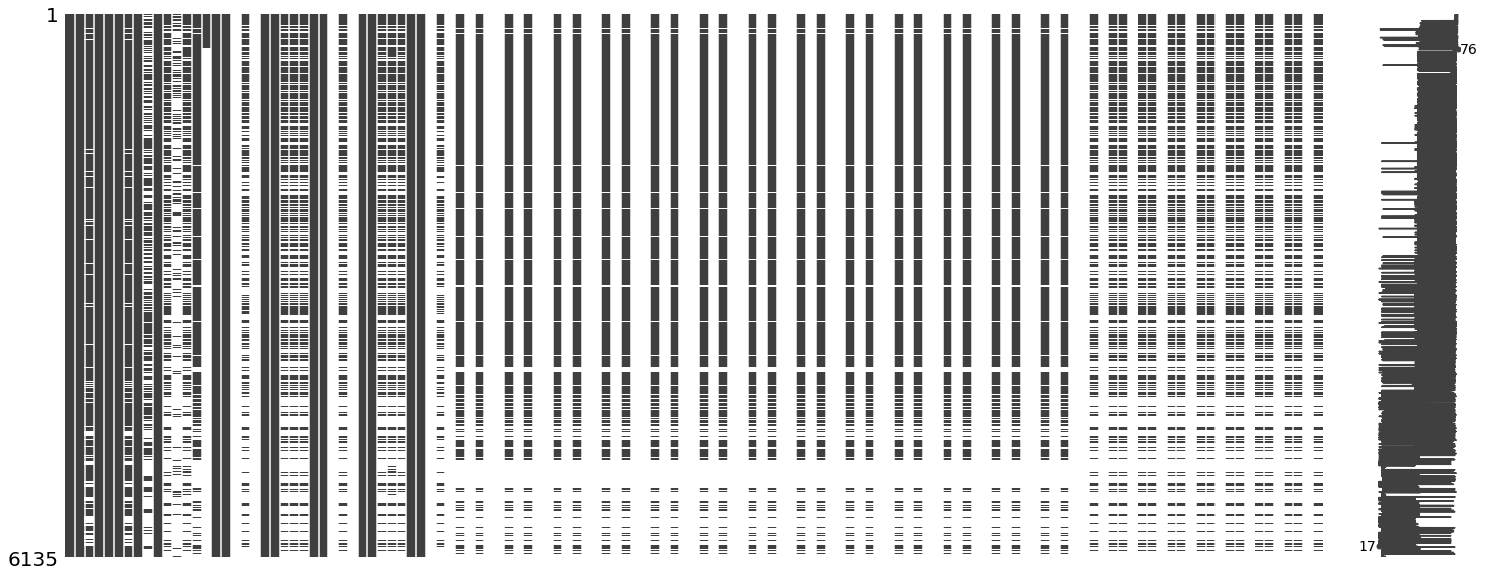

In [11]:
msno.matrix(df)

# Drop unneed fields

In [12]:
df.isna().sum()

id                                  0
averageRating                       0
category                          844
flowerImageSvg                      0
name                                0
                                 ... 
terps_pinene_description         6135
terps_pinene_score               3225
terps_terpinolene_name           3225
terps_terpinolene_description    6135
terps_terpinolene_score          3225
Length: 129, dtype: int64

In [13]:
df2 = df.dropna(axis=1, how='all')

In [15]:
df2.shape

(6135, 76)

In [16]:
df.shape

(6135, 129)

In [17]:
list(df.columns)

['id',
 'averageRating',
 'category',
 'flowerImageSvg',
 'name',
 'nugImage',
 'phenotype',
 'reviewCount',
 'shortDescriptionPlain',
 'slug',
 'strainTopTerp',
 'subtitle',
 'thc',
 'topEffect',
 'distanceMi',
 'cannabinoids_cbc_displayName',
 'cannabinoids_cbc_order',
 'cannabinoids_cbc_percentile25',
 'cannabinoids_cbc_percentile50',
 'cannabinoids_cbc_percentile75',
 'cannabinoids_cbd_displayName',
 'cannabinoids_cbd_order',
 'cannabinoids_cbd_percentile25',
 'cannabinoids_cbd_percentile50',
 'cannabinoids_cbd_percentile75',
 'cannabinoids_cbg_displayName',
 'cannabinoids_cbg_order',
 'cannabinoids_cbg_percentile25',
 'cannabinoids_cbg_percentile50',
 'cannabinoids_cbg_percentile75',
 'cannabinoids_thc_displayName',
 'cannabinoids_thc_order',
 'cannabinoids_thc_percentile25',
 'cannabinoids_thc_percentile50',
 'cannabinoids_thc_percentile75',
 'cannabinoids_thcv_displayName',
 'cannabinoids_thcv_order',
 'cannabinoids_thcv_percentile25',
 'cannabinoids_thcv_percentile50',
 'cannab

In [17]:
list(df2.columns)

['id',
 'averageRating',
 'category',
 'flowerImageSvg',
 'name',
 'nugImage',
 'phenotype',
 'reviewCount',
 'shortDescriptionPlain',
 'slug',
 'strainTopTerp',
 'subtitle',
 'thc',
 'topEffect',
 'distanceMi',
 'cannabinoids_cbc_displayName',
 'cannabinoids_cbc_order',
 'cannabinoids_cbc_percentile50',
 'cannabinoids_cbd_displayName',
 'cannabinoids_cbd_order',
 'cannabinoids_cbd_percentile25',
 'cannabinoids_cbd_percentile50',
 'cannabinoids_cbd_percentile75',
 'cannabinoids_cbg_displayName',
 'cannabinoids_cbg_order',
 'cannabinoids_cbg_percentile50',
 'cannabinoids_thc_displayName',
 'cannabinoids_thc_order',
 'cannabinoids_thc_percentile25',
 'cannabinoids_thc_percentile50',
 'cannabinoids_thc_percentile75',
 'cannabinoids_thcv_displayName',
 'cannabinoids_thcv_order',
 'cannabinoids_thcv_percentile50',
 'effects_aroused_name',
 'effects_aroused_score',
 'effects_creative_name',
 'effects_creative_score',
 'effects_energetic_name',
 'effects_energetic_score',
 'effects_euphoric_n

In [20]:

drop_list = [i for i in df2.columns if df[i].nunique()==1]
drop_list

['cannabinoids_cbc_displayName',
 'cannabinoids_cbd_displayName',
 'cannabinoids_cbg_displayName',
 'cannabinoids_thc_displayName',
 'cannabinoids_thcv_displayName',
 'effects_aroused_name',
 'effects_creative_name',
 'effects_energetic_name',
 'effects_euphoric_name',
 'effects_focused_name',
 'effects_giggly_name',
 'effects_happy_name',
 'effects_hungry_name',
 'effects_relaxed_name',
 'effects_sleepy_name',
 'effects_talkative_name',
 'effects_tingly_name',
 'effects_uplifted_name',
 'terps_caryophyllene_name',
 'terps_humulene_name',
 'terps_limonene_name',
 'terps_linalool_name',
 'terps_myrcene_name',
 'terps_ocimene_name',
 'terps_pinene_name',
 'terps_terpinolene_name']

In [31]:
df3 = df2.drop(columns=drop_list)
df4 = df3.drop(columns=['flowerImageSvg','nugImage','shortDescriptionPlain'])
df4.shape

(6135, 47)

<AxesSubplot:>

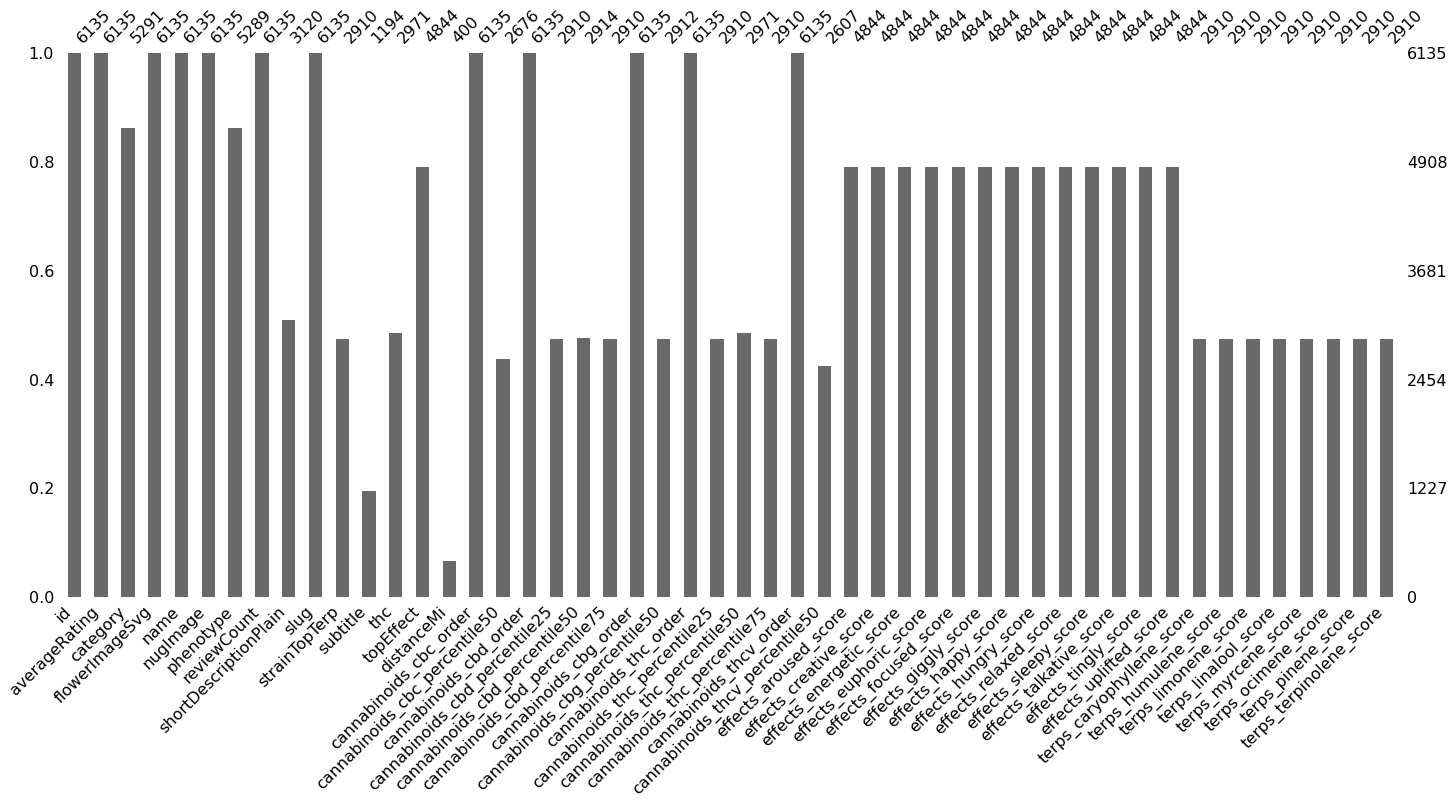

In [32]:
msno.bar(df3)

In [33]:
df3[ 'cannabinoids_cbc_order']

0       4
1       3
2       3
3       4
4       3
       ..
6130    3
6131    3
6132    3
6133    3
6134    3
Name: cannabinoids_cbc_order, Length: 6135, dtype: int64

In [37]:
df4.to_csv('slightly_cleaned.csv', index=False)

#drop fields with order in it

In [35]:
# inspect the query for the review pages
# see if an api like request is available 

#review request
# https://consumer-api.leafly.com/api/strains/v1/wedding-cake/reviews?skip=0&take=3&sort[0][upvotes_count]=desc
# https://consumer-api.leafly.com/api/strains/v1/wedding-cake/reviews?skip=0&take=8&sort[0][upvotes_count]=desc

# example 
# https://medium.com/@aandrei_38387/mining-leafly-data-ae87c4b73856




In [36]:
import requests


headers = {
    'authority': 'consumer-api.leafly.com',
    'accept': 'application/json',
    'accept-language': 'en-GB,en;q=0.7',
    # Requests sorts cookies= alphabetically
    'origin': 'https://www.leafly.com',
    'referer': 'https://www.leafly.com/',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-site',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1',
    'x-app': 'web-web',
    'x-environment': 'prod',
}

response1 = requests.get('https://consumer-api.leafly.com/api/strains/v1/wedding-cake/reviews?skip=0&take=60&sort\\[0\\]\\[upvotes_count\\]=desc', headers=headers)

In [5]:
review_data = response1.json()
review_data['data'][0]

{'id': 2989453,
 'avatar': 'https://public.leafly.com/avatars/29.png',
 'consumptionMethod': 'smoke',
 'created': '2022-10-04T19:19:12.071Z',
 'form': 'flower',
 'isPrivate': False,
 'language': 'en',
 'moderationStatus': 'approved',
 'potency': None,
 'rating': 5.0,
 'reportedBenefits': [],
 'reportedFeelings': [],
 'reportedFlavors': [],
 'reportedNegatives': [],
 'strainSlug': 'wedding-cake',
 'text': 'first time trying this strain:\nhits hard , chill and giggly . a really nice cherry like flavor . amazing . literally the best . amazing sex too .  chill at work.\n\nsecond time buying: doesn’t make me hungry, makes me kinda trippy though and all confusion . paranoid a little at work when communication with other employees but definitely made me productive at the job',
 'upvotesCount': 0,
 'user': {'id': 6353839,
  'avatar': 'https://public.leafly.com/avatars/29.png',
  'profileImageUrl': 'https://public.leafly.com/avatars/29.png',
  'publicId': 'bcdb860b-e2c5-4b4d-a8d9-3f5e549ff4a3',

In [9]:
# flatten MAKE THIS INTO A FUNCTION

review_df = pd.concat([pd.json_normalize(v, sep='_') for v in review_data['data']])
review_df.reset_index(drop=True, inplace=True)
#use differenett seperator
review_df.to_csv('reviews.csv',index=False)

In [13]:
review_num = review_data['metadata']['totalCount']
review_num

1768

In [32]:
MAX_REVIEW_TAKE = 60
strain = 'wedding-cake'
skip = 1760
test_review_request = f'https://consumer-api.leafly.com/api/strains/v1/{0}/reviews?skip={1}&take={2}&sort\\[0\\]\\[upvotes_count\\]=desc'
requests.get(test_review_request, headers=headers).json()

{'data': [{'id': 1287894,
   'avatar': 'https://public.leafly.com/avatars/76.png',
   'consumptionMethod': None,
   'created': '2016-07-27T05:14:11.048Z',
   'form': None,
   'isPrivate': False,
   'language': 'en',
   'moderationStatus': 'approved',
   'potency': {},
   'rating': 5.0,
   'reportedBenefits': [],
   'reportedFeelings': [],
   'reportedFlavors': ['Sweet'],
   'reportedNegatives': [],
   'strainSlug': 'wedding-cake',
   'text': 'I bought this in a dispensary in Carbondale, CO some time in 2015, though I admit I don\'t recall which dispensary :( wish I did because they deserve props for stocking this awesome genetic. \nI remember the nug was very beautiful to look at, but the main feature was its SCENT and FLAVOR. Memories of a sugary sweet white frosting, maybe with those multicolored confetti. What more can I say than that.  \nVery potent head and body high and very long lasting. \n(BTW - This strain has already been created, under "Birthday Cake Kush" (same thing, just 

In [39]:
review_request = lambda strain, skip, take: f'https://consumer-api.leafly.com/api/strains/v1/{strain}/reviews?skip={skip*60}&take={take}&sort\\[0\\]\\[upvotes_count\\]=desc'

In [40]:
review_request('wedding-cake',0,1)

'https://consumer-api.leafly.com/api/strains/v1/weeding-cake/reviews?skip=0&take=1&sort\\[0\\]\\[upvotes_count\\]=desc'

In [52]:
get_review_num = lambda strain: requests.get(review_request(strain, 0, 0 ), headers=headers).json()['metadata']['totalCount']


In [53]:
get_review_num('wedding-cake')

1769

In [61]:
import numpy as np
import math 

In [69]:
math.ceil(get_review_num('wedding-cake') / 60)


30

In [62]:
np.ceil(get_review_num('wedding-cake') / 60)


30.0

In [66]:
get_review_batch = lambda strain, skip: requests.get(review_request(strain, skip*60, MAX_REVIEW_TAKE ), headers=headers).json()['data']


In [70]:
data = get_review_batch('wedding-cake', 0)
data

[{'id': 2990098,
  'avatar': 'https://public.leafly.com/avatars/158.png',
  'consumptionMethod': 'smoke',
  'created': '2022-10-06T02:53:30.011Z',
  'form': 'flower',
  'isPrivate': False,
  'language': 'en',
  'moderationStatus': 'approved',
  'potency': {},
  'rating': 5.0,
  'reportedBenefits': ['Anxiety', 'Depression', 'PTSD', 'Stress'],
  'reportedFeelings': ['Aroused', 'Euphoric', 'Happy', 'Relaxed', 'Tingly'],
  'reportedFlavors': ['Mint', 'Sweet', 'Vanilla'],
  'reportedNegatives': ['Dry Eyes', 'Dry Mouth'],
  'strainSlug': 'wedding-cake',
  'text': "My absolute favorite strain I've tried so far. This thing is a fantastic strain to relax and just vibe with. You can just feel the stress melt away. For me, my mind is usually extremely fuzzy, but in a good way. It also does stimulate arousal so... do what you will with that information.",
  'upvotesCount': 0,
  'user': {'id': 7600475,
   'avatar': 'https://public.leafly.com/avatars/158.png',
   'profileImageUrl': 'https://public.l

In [64]:
review_data = []

In [68]:
import time

In [ ]:
def get_strain_reviews(strain):
    num_reviews_batches = np.ceil(get_review_num(strain)/60)
    
    for i in range(num_reviews_batches):
        time.sleep(1)
        data = get_review_batch(strain, i)
        
        try:

            review_data.extend(iter(data['hits']['strain']))
        except Exception:
            print(f'failed to grab 60 at {60*i}')



In [10]:
# review data is a lot messier since the text is stoner generated 
# onec prices is comple then thread
# function to 

In [ ]:
# after finding the best way to clean out the review data
# https://github.com/saiskee/Leafly-scraper

In [ ]:


# dispensary 